In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
df.nunique()

,0
Unnamed: 0,1000
Age,53
Sex,2
Job,4
Housing,3
Saving accounts,4
Checking account,3
Credit amount,921
Duration,33
Purpose,8


In [6]:
df['Housing'].value_counts()

,count
Housing,
own,713
rent,179
free,108


In [7]:
df['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


In [8]:
df['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [9]:
df['Purpose'].value_counts()

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


In [10]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

**Insights:** Most customers own their homes, have their savings/ checking bank accounts classified as "little", opened their accounts with the purpose of purchasing a car, radio/TV and furniture/equipment.

# Univariate Analysis

In [12]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


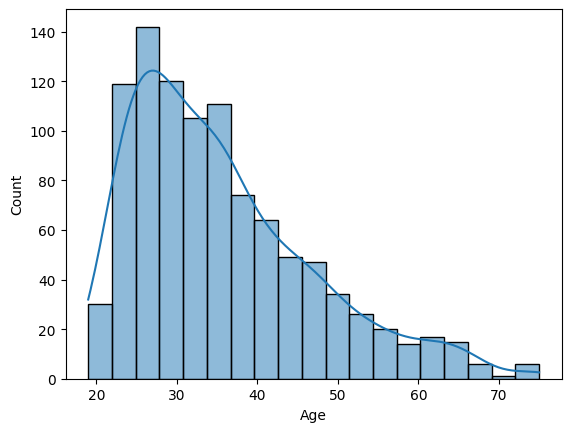

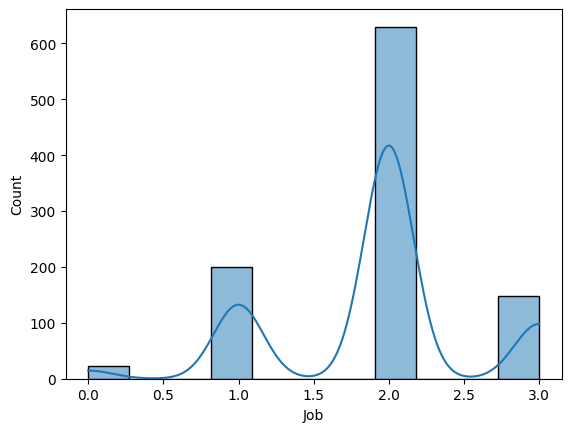

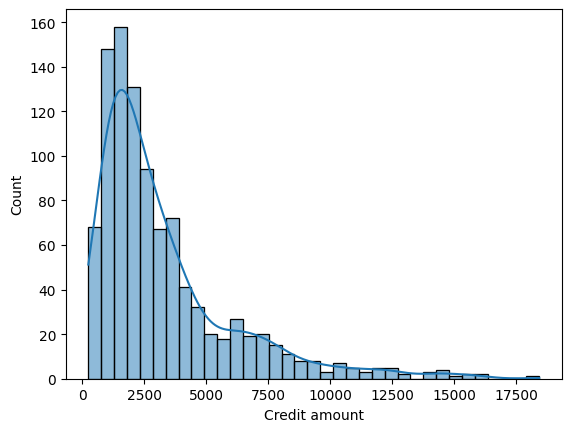

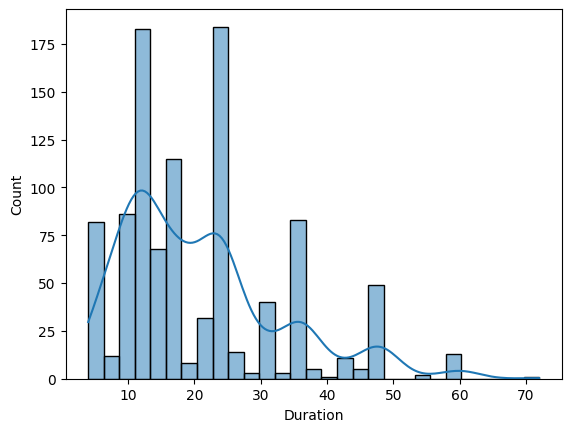

In [13]:
columns = ['Age', 'Job', 'Credit amount', 'Duration']
for i in columns:
    plt.figure()
    sns.histplot(df[i], kde=True)

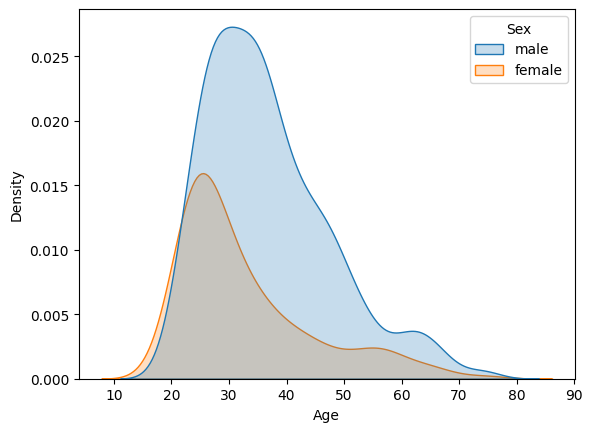

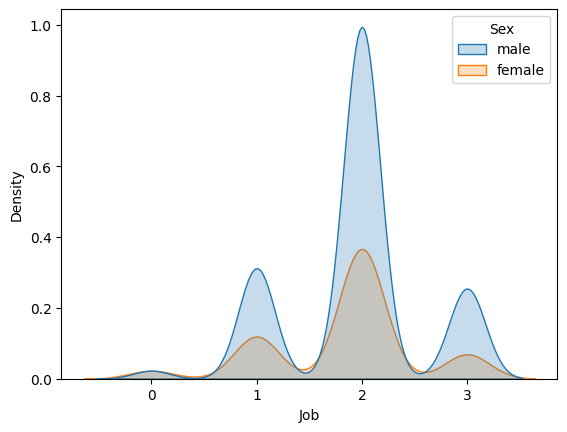

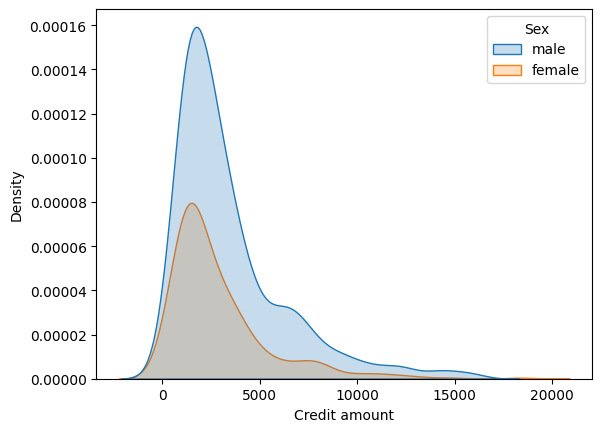

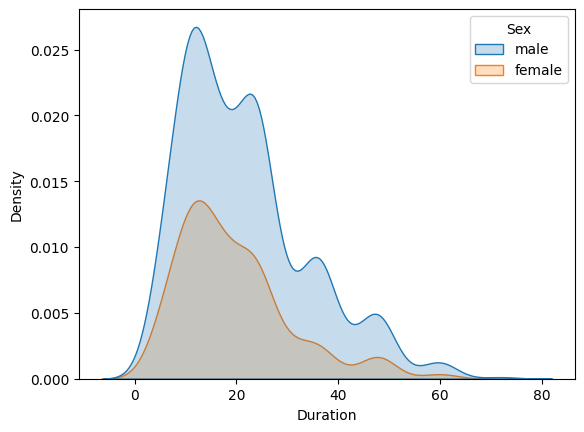

In [14]:
columns = ['Age', 'Job', 'Credit amount', 'Duration']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],fill=True,hue=df['Sex'])

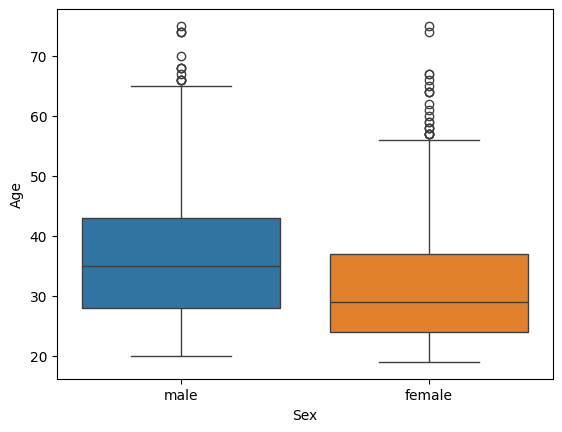

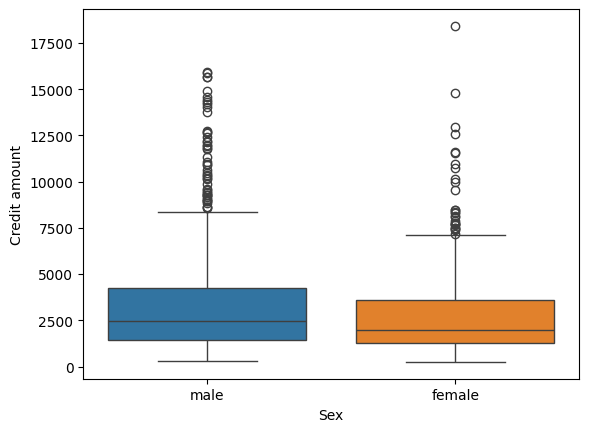

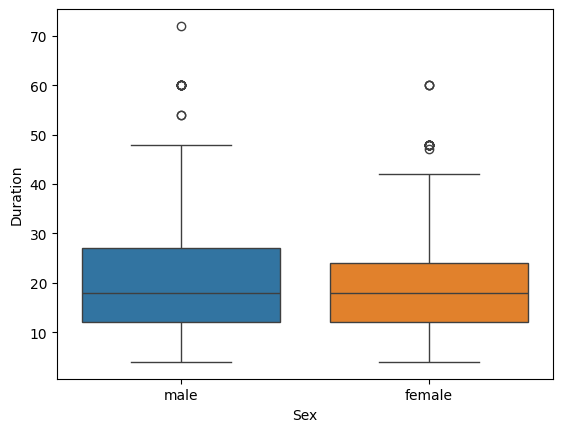

In [15]:
columns = ['Age', 'Credit amount', 'Duration']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Sex',y=df[i],hue='Sex')

<Axes: xlabel='Purpose', ylabel='Credit amount'>

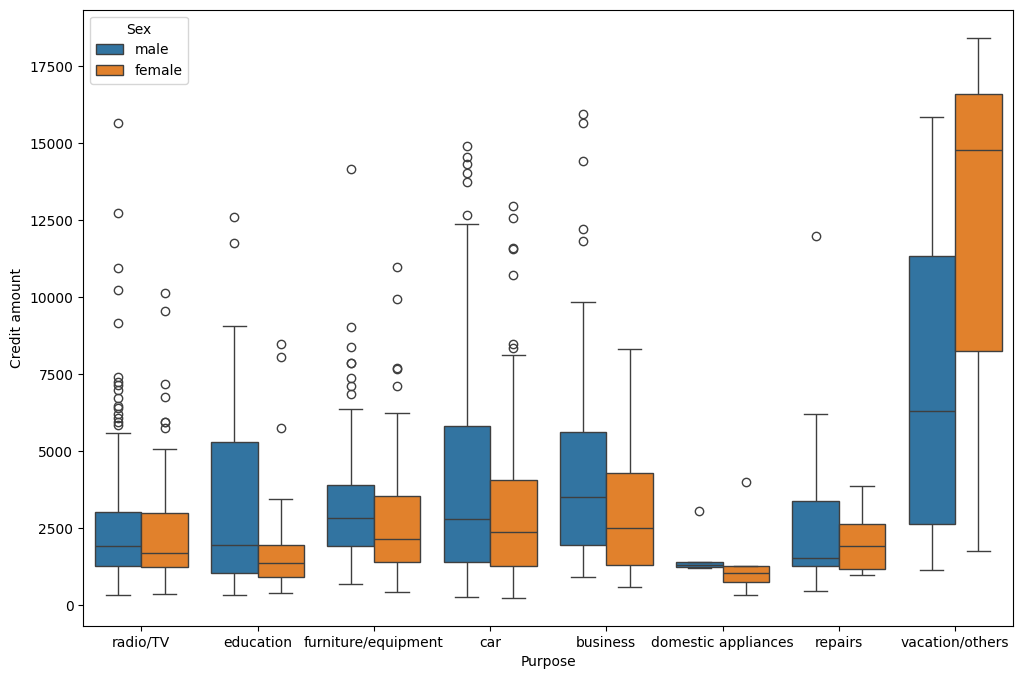

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Purpose',y='Credit amount',hue='Sex')

In [17]:
df['Sex'].value_counts(normalize=True)

,proportion
Sex,
male,0.69
female,0.31


**Insights:** The customers ages are in the late twenties for the females and early thirties for the males. Males are more than females.
Most customers do 2 jobs.
Most of the customers have credit amount about 2000$, and customers get loans for nearly 12-25 months.
Highest credit loans are given for the vacations. Women spend more than men on vacations/others and repairs while men spend more for the other purposes.

**Note:** As the distributions are right-skewed, specially for the credit amount that has a long tail, logarithmic transformation is required to remove the skewness and the outliers so that clustring algorithm becomes more efficient.

# Bivariate Analysis

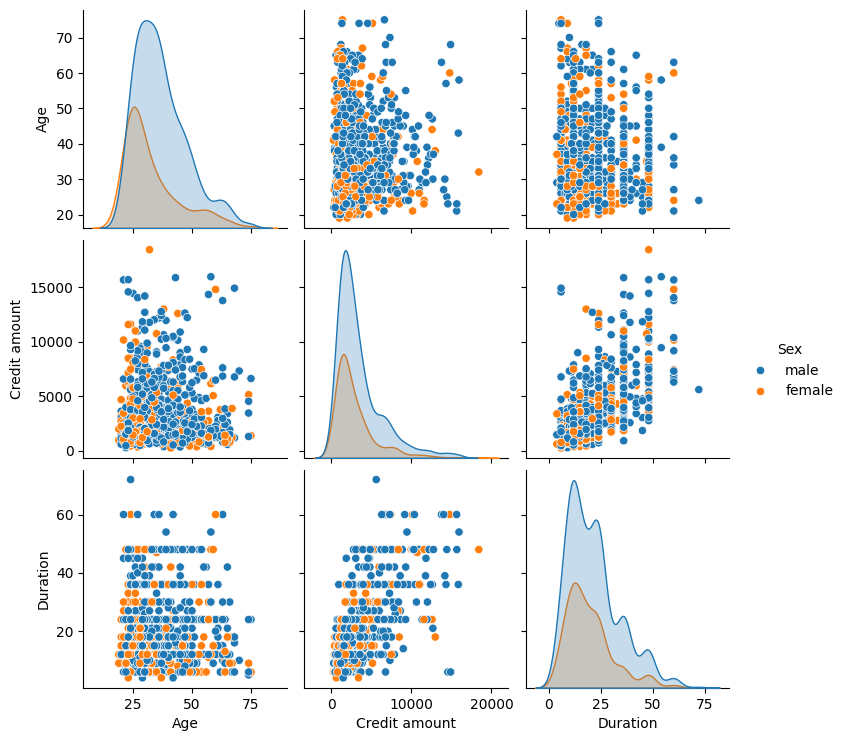

In [18]:
df0=df.drop('Job',axis=1)
sns.pairplot(df0,hue='Sex')

In [19]:
df.groupby(['Sex'])[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Sex,,,
female,32.803226,2877.774194,19.43871
male,36.778261,3448.040580,21.56087


In [20]:
numerical_cols = ['Age', 'Credit amount', 'Duration']
numerical_df = df[numerical_cols]
numerical_df.head()


,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


<Axes: >

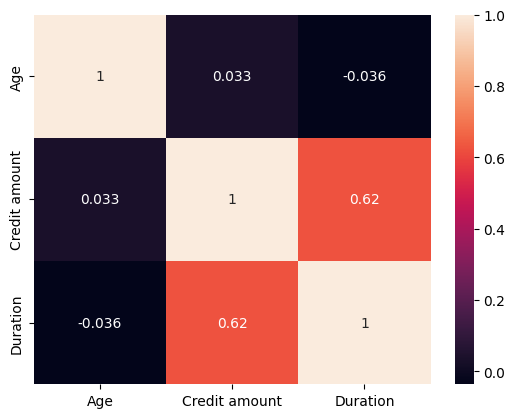

In [24]:
sns.heatmap(numerical_df.corr(),annot=True)

**Preprocessing and Scaling**

In [25]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [26]:
dff.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [27]:
dff_BiCl = dff[['Age', 'Credit amount', 'Duration','Sex_male']]
dff_BiCl.head()

,Age,Credit amount,Duration,Sex_male
0,67,1169,6,True
1,22,5951,48,False
2,49,2096,12,True
3,45,7882,42,True
4,53,4870,24,True


In [60]:
numerical_df_log = np.log(numerical_df)
numerical_df_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [61]:
concatenated_df = pd.concat([numerical_df_log, dff['Sex_male']], axis=1)
concatenated_df.head()


,Age,Credit amount,Duration,Sex_male
0,4.204693,7.063904,1.791759,True
1,3.091042,8.691315,3.871201,False
2,3.891820,7.647786,2.484907,True
3,3.806662,8.972337,3.737670,True
4,3.970292,8.490849,3.178054,True


In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [47]:
# Only scaled, without logarithm
dff_BiCl = scale.fit_transform(numerical_df)
dff_BiCl = pd.DataFrame(dff_BiCl)
dff_BiCl.columns = ['Age', 'Credit amount', 'Duration']
dff_BiCl.head()

,Age,Credit amount,Duration
0,2.766456,-0.745131,-1.236478
1,-1.191404,0.949817,2.248194
2,1.183312,-0.416562,-0.738668
3,0.831502,1.634247,1.750384
4,1.535122,0.566664,0.256953


In [62]:
# Scaled, logarithm, concatenated with 'Sex_male'
scale2 = StandardScaler()
dff_BiC2 = scale2.fit_transform(concatenated_df)
dff_BiC2 = pd.DataFrame(dff_BiC2)
dff_BiC2.columns = ['Age', 'Credit amount', 'Duration','Sex_male']
dff_BiC2.head()

,Age,Credit amount,Duration,Sex_male
0,2.271006,-0.933901,-1.864869,0.670280
1,-1.446152,1.163046,1.708369,-1.491914
2,1.226696,-0.181559,-0.673790,0.670280
3,0.942455,1.525148,1.478913,0.670280
4,1.488620,0.904743,0.517289,0.670280


# Clustering - Univariate, Bivariate, Multivariate

In [48]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Credit amount']])

KMeans(n_clusters=3)

In [49]:
df['Credit amount Cluster'] = clustering1.labels_
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit amount Cluster,Credit amout and Duration Cluster
0,67,male,2,own,NaN,little,1169,6,radio/TV,2,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,1
2,49,male,1,own,little,NaN,2096,12,education,2,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,1
4,53,male,2,free,little,little,4870,24,car,0,2


In [50]:
df['Credit amount Cluster'].value_counts(normalize=True)

,proportion
Credit amount Cluster,
2,0.693
0,0.242
1,0.065


In [51]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Credit amount']])
    intertia_scores.append(kmeans.inertia_)

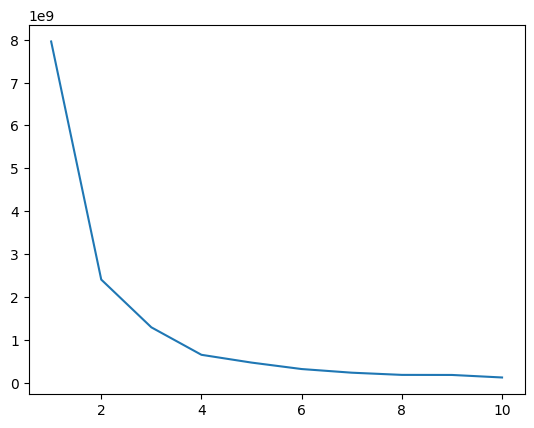

In [52]:
plt.plot(range(1,11),intertia_scores)

In [53]:
df.groupby('Credit amount Cluster')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Credit amount Cluster,,,
0,35.863636,5338.698347,29.024793
1,35.892308,11248.569231,38.738462
2,35.402597,1801.062049,16.393939


**Bivariate Clustering**

In [63]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(dff_BiCl[['Credit amount', 'Duration']])
df['Credit amout and Duration Cluster'] =clustering2.labels_
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit amount Cluster,Credit amout and Duration Cluster
0,67,male,2,own,NaN,little,1169,6,radio/TV,2,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,2
2,49,male,1,own,little,NaN,2096,12,education,2,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,2
4,53,male,2,free,little,little,4870,24,car,0,0


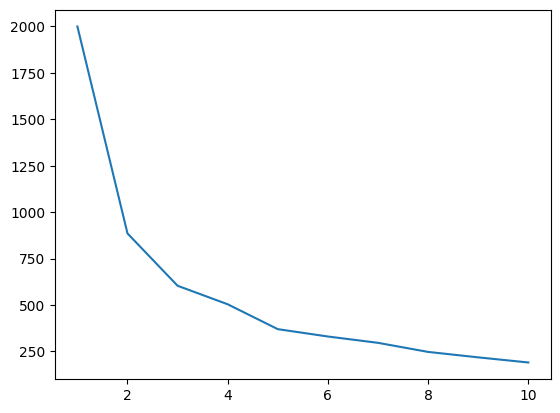

In [64]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(dff_BiCl[['Credit amount', 'Duration']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [65]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

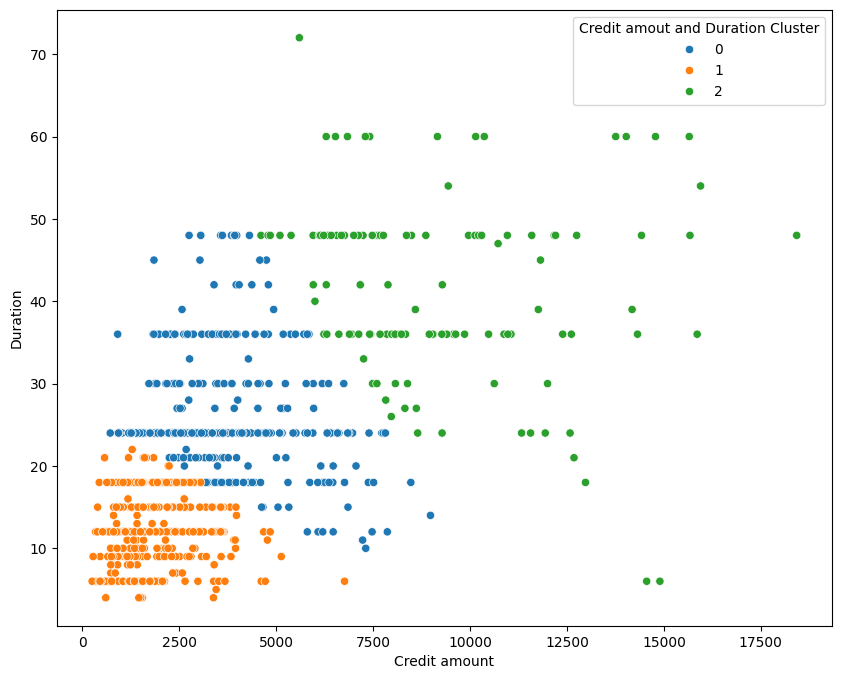

In [66]:
plt.figure(figsize=(10,8))
# plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Credit amount',y='Duration',hue='Credit amout and Duration Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [67]:
pd.crosstab(df['Credit amout and Duration Cluster'],df['Sex'],normalize='index')

Sex,female,male
Credit amout and Duration Cluster,,
0,0.265416,0.734584
1,0.354331,0.645669
2,0.260504,0.739496


In [68]:
df.groupby('Credit amout and Duration Cluster')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Credit amout and Duration Cluster,,,
0,35.367292,3515.973190,26.410188
1,35.561024,1692.340551,12.029528
2,36.042017,9244.462185,41.521008


**Conclusion**

Cluster 0: intermidiate mean of credit amount, intermidiate duration

Cluster 1: lowest mean of credit amount, shortest duration, decreased number of males

Cluster 2: highest mean of credit amount, longest duration

**Mulivariate Clustering**

In [69]:
dff = dff[['Age', 'Credit amount', 'Duration','Sex_male']]
dff.head()

,Age,Credit amount,Duration,Sex_male
0,67,1169,6,True
1,22,5951,48,False
2,49,2096,12,True
3,45,7882,42,True
4,53,4870,24,True


In [70]:
dff_BiC2.head()

,Age,Credit amount,Duration,Sex_male
0,2.271006,-0.933901,-1.864869,0.670280
1,-1.446152,1.163046,1.708369,-1.491914
2,1.226696,-0.181559,-0.673790,0.670280
3,0.942455,1.525148,1.478913,0.670280
4,1.488620,0.904743,0.517289,0.670280


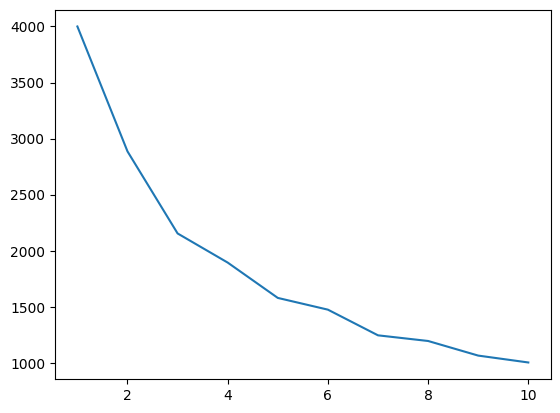

In [71]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff_BiC2)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [72]:
clustering3 = KMeans(n_clusters=4)
clustering3.fit(dff_BiC2[['Age','Credit amount', 'Duration']])
df['Age, Credit amout and Duration Cluster'] =clustering3.labels_
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit amount Cluster,Credit amout and Duration Cluster,"Age, Credit amout and Duration Cluster"
0,67,male,2,own,NaN,little,1169,6,radio/TV,2,1,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,2,0
2,49,male,1,own,little,NaN,2096,12,education,2,1,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,2,0
4,53,male,2,free,little,little,4870,24,car,0,0,3


In [73]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit amount Cluster,Credit amout and Duration Cluster,"Age, Credit amout and Duration Cluster"
0,67,male,2,own,NaN,little,1169,6,radio/TV,2,1,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,2,0
2,49,male,1,own,little,NaN,2096,12,education,2,1,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,2,0
4,53,male,2,free,little,little,4870,24,car,0,0,3


In [ ]:
df.to_csv('Clustering.csv')